In [1]:
from main import Main
from player import *
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline
import seaborn as sn
from pandas.tools.plotting import andrews_curves, autocorrelation_plot

In [2]:
b_player1 = BasePlayer("Player1")
b_player2 = BasePlayer("Player2")
ran_player1 = RandomThrow("Player1")
ran_player2 = RandomThrow("Player2")
r6_player1 = RollSixThenHold("Player1")
r6_player2 = RollSixThenHold("Player2")
r5_player1 = RollFiveThenHold("Player1")
r5_player2 = RollFiveThenHold("Player2")
r4_player1 = RollFourThenHold("Player1")
r4_player2 = RollFourThenHold("Player2")
r3_player1 = RollThreeThenHold("Player1")
r3_player2 = RollThreeThenHold("Player2")
r2_player1 = RollThreeThenHold("Player1")
r2_player2 = RollThreeThenHold("Player2")

In [3]:
#basic game
a = Main(12000, b_player1, b_player2)
a.main()
#random game
b = Main(12000, ran_player1, ran_player2)
b.main()

# 6-2 rolls
c = Main(12000, r6_player1, r6_player2)
c.main()
d = Main(12000, r5_player1, r5_player2)
d.main()
e = Main(12000, r4_player1, r4_player2)
e.main()
f = Main(12000, r3_player1, r3_player2)
f.main()
g = Main(12000, r2_player1, r2_player2)
g.main()



In [4]:
#Merging simliar games into the same Data Frame
basic_game = pd.merge(Series(b_player1.get_total_score_list()).reset_index().rename(columns = {0:'BG_P1'}), 
                      Series(b_player2.get_total_score_list()).reset_index().rename(columns = {0:'BG_P2'}))

rand_game = pd.merge(Series(ran_player1.get_total_score_list()).reset_index().rename(columns = {0:'Ran_P1'}), 
                      Series(ran_player2.get_total_score_list()).reset_index().rename(columns = {0:'Ran_P2'}))

r6_game = pd.merge(Series(r6_player1.get_total_score_list()).reset_index().rename(columns = {0:'Roll6_P1'}),
                   Series(r6_player2.get_total_score_list()).reset_index().rename(columns = {0:'Roll6_P2'}))

r5_game = pd.merge(Series(r5_player1.get_total_score_list()).reset_index().rename(columns = {0:'Roll5_P1'}),
                   Series(r5_player2.get_total_score_list()).reset_index().rename(columns = {0:'Roll5_P2'}))

r4_game = pd.merge(Series(r4_player1.get_total_score_list()).reset_index().rename(columns = {0:'Roll4_P1'}),
                   Series(r4_player2.get_total_score_list()).reset_index().rename(columns = {0:'Roll4_P2'}))
    
r3_game = pd.merge(Series(r3_player1.get_total_score_list()).reset_index().rename(columns = {0:'Roll3_P1'}),
                        Series(r3_player2.get_total_score_list()).reset_index().rename(columns = {0:'Roll3_P2'}))
    
r2_game = pd.merge(Series(r2_player1.get_total_score_list()).reset_index().rename(columns = {0:'Roll2_P1'}),
                        Series(r2_player2.get_total_score_list()).reset_index().rename(columns = {0:'Roll2_P2'}))


In [5]:
print(len(basic_game), len(rand_game), len(r6_game), len(r5_game), len(r4_game), len(r3_game), len(r2_game))

11324 11408 11214 11361 11387 11404 11413


In [26]:
#Merging Games into one main table and cleaning data
all_games = pd.merge(pd.merge(basic_game[:10000], rand_game[:10000]), r6_game[:10000])
all_games = pd.merge(pd.merge(all_games, r5_game[:10000]), r4_game[:10000])
all_games = pd.merge(pd.merge(all_games, r3_game[:10000]), r2_game[:10000])
all_games1 = all_games.copy()
all_games1.head()


,index,BG_P1,BG_P2,Ran_P1,Ran_P2,Roll6_P1,Roll6_P2,Roll5_P1,Roll5_P2,Roll4_P1,Roll4_P2,Roll3_P1,Roll3_P2,Roll2_P1,Roll2_P2
0,0,26,15,16,10,17,3,9,18,15,5,16,13,17,16
1,1,32,24,3,11,10,3,8,9,2,20,4,13,16,21
2,2,15,26,7,14,6,14,9,17,6,14,7,8,2,17
3,3,29,25,15,9,4,7,12,10,12,13,16,17,9,16
4,4,14,27,7,10,10,5,11,13,17,9,19,6,11,8


In [27]:
del all_games['index']

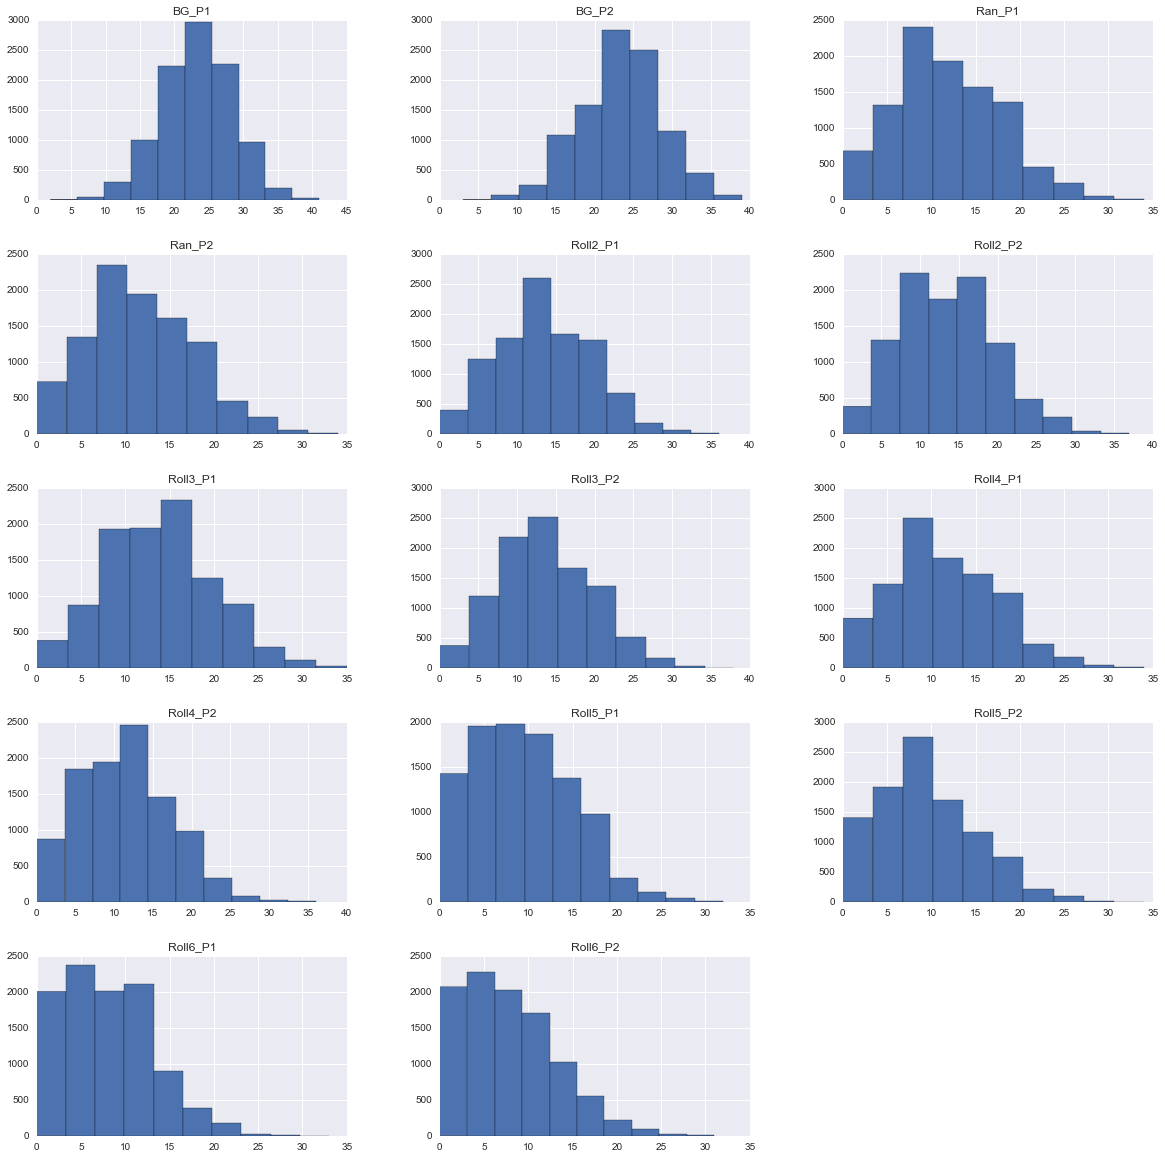

In [7]:
all_games.hist(figsize=(20,20), layout=(5,3))
plt.show()

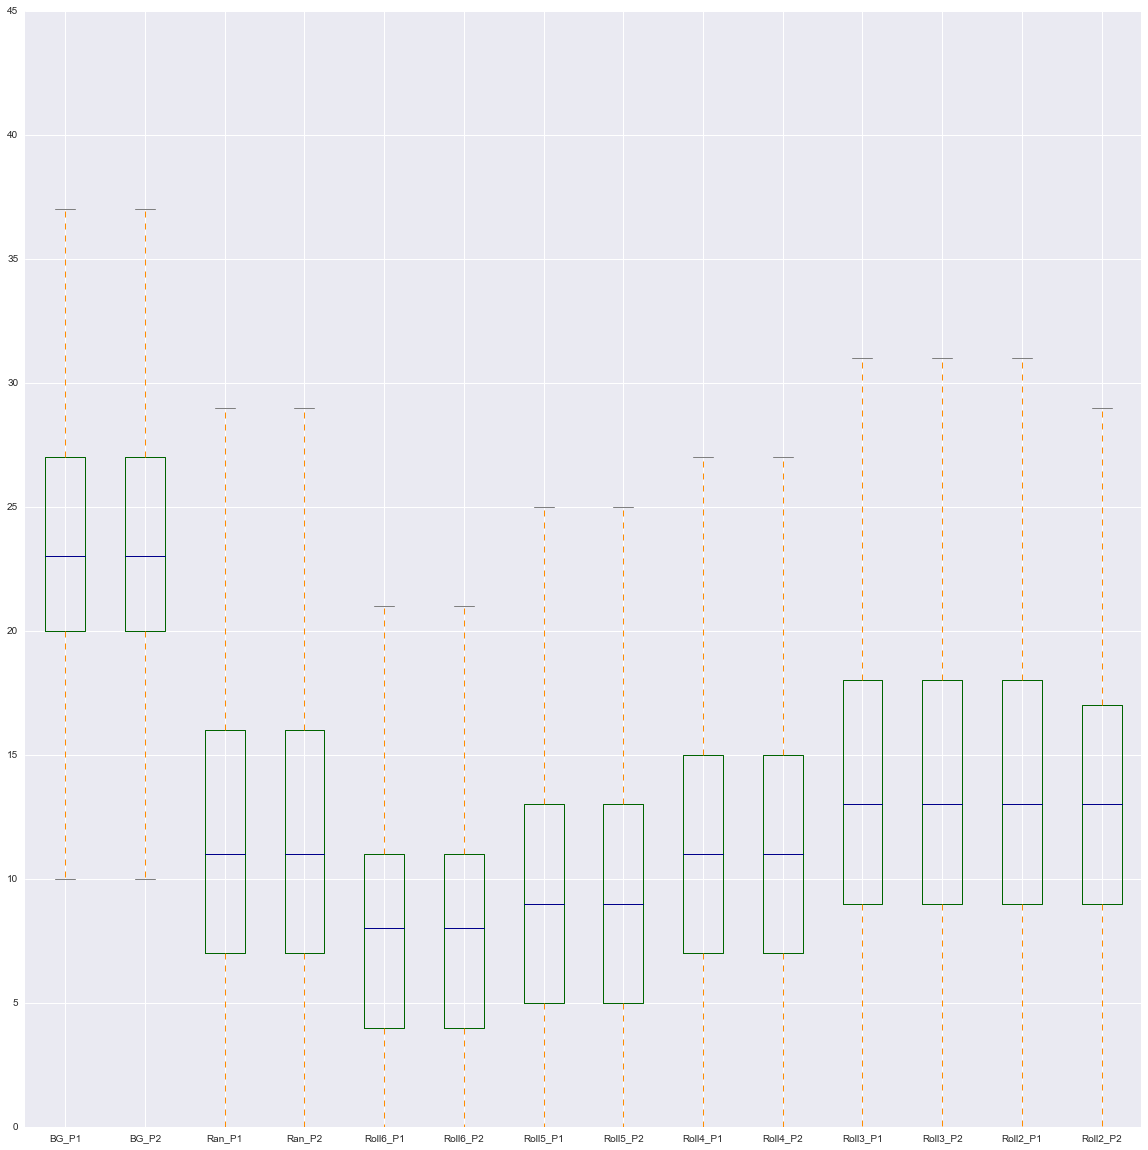

In [8]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
   ....:              medians='DarkBlue', caps='Gray')
all_games.plot(kind='box',figsize=(20,20), color=color, sym='r+')
plt.show()

In [9]:
# ax = all_games.plot(kind='area', legend=True, figsize=(20,20))
# plt.title('Dice Roll Trends')
# ax.legend(bbox_to_anchor=(1.2, .75), fontsize='24')
# def onpick3(event):
#     ind = event.ind
#     print('onpick3 scatter:', ind, npy.take(x, ind), npy.take(y, ind))


# plt.show()

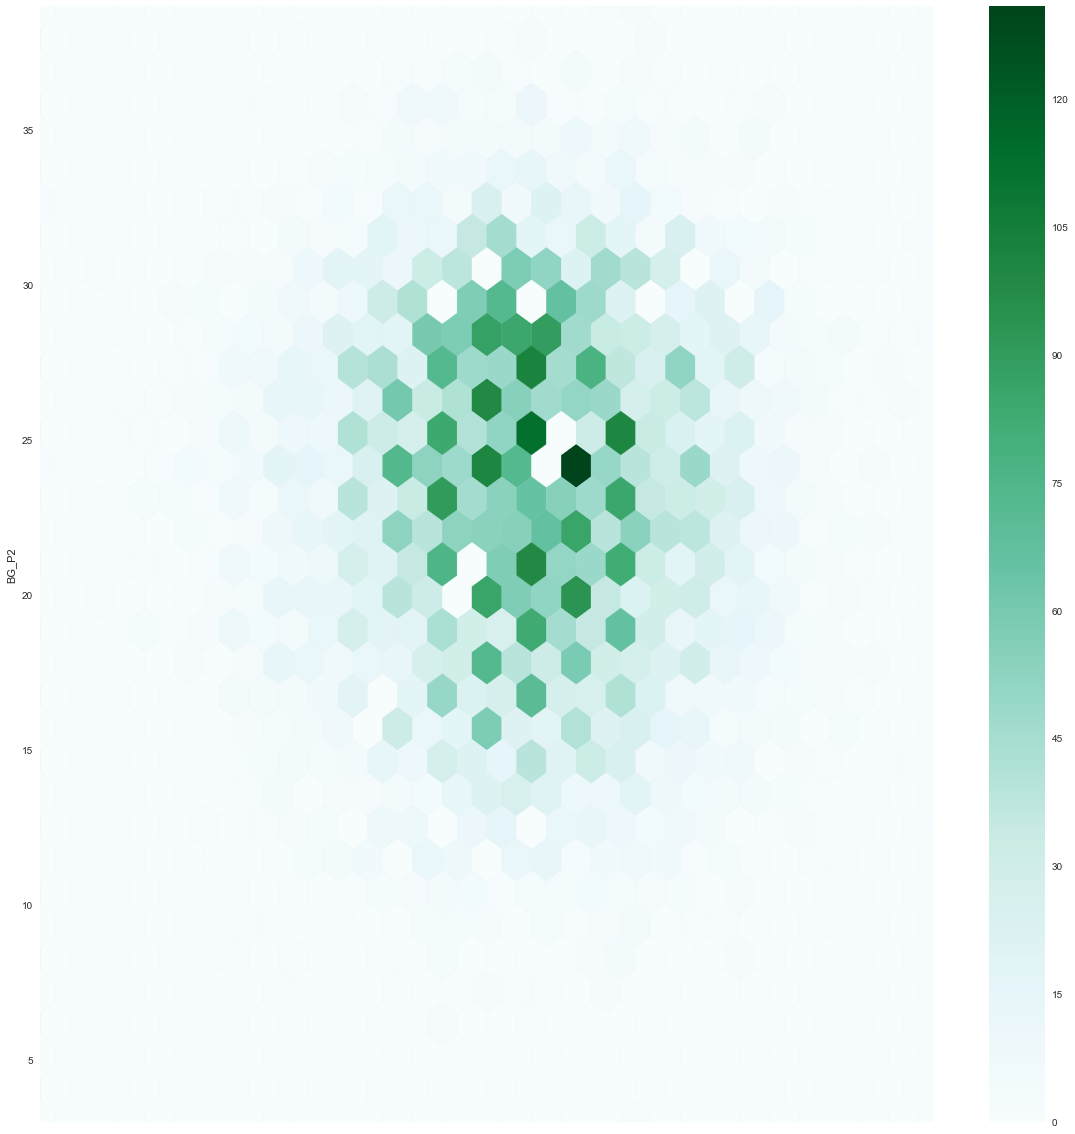

In [10]:
all_games.plot(kind='hexbin', x='BG_P1', y='BG_P2', gridsize=30, figsize=(20,20))
plt.show()

In [29]:
all_games1.head()

,index,BG_P1,BG_P2,Ran_P1,Ran_P2,Roll6_P1,Roll6_P2,Roll5_P1,Roll5_P2,Roll4_P1,Roll4_P2,Roll3_P1,Roll3_P2,Roll2_P1,Roll2_P2
0,0,26,15,16,10,17,3,9,18,15,5,16,13,17,16
1,1,32,24,3,11,10,3,8,9,2,20,4,13,16,21
2,2,15,26,7,14,6,14,9,17,6,14,7,8,2,17
3,3,29,25,15,9,4,7,12,10,12,13,16,17,9,16
4,4,14,27,7,10,10,5,11,13,17,9,19,6,11,8


In [32]:
all_games1.pivot('BG_P1', value=value)

NameError: name 'value' is not defined